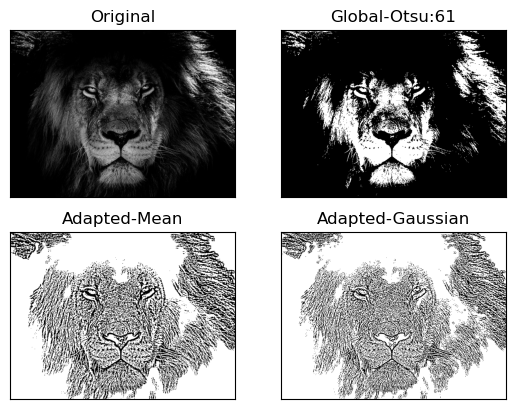

In [9]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블록 크기: 어댑티브 쓰레시홀딩에서 사용할 주변 픽셀 영역의 크기
C = 5               # 차감 상수: 계산된 임계값에서 뺄 값
img = cv2.imread('../img/lion.jpg', cv2.IMREAD_GRAYSCALE) # 그레이스케일 이미지로 읽기

# ---① 오츠의 알고리즘을 사용하여 단일 임계값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어댑티브 쓰레시홀드를 평균값 및 가우시안 분포를 기준으로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplotlib을 사용하여 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])

plt.show()
